# Hugging Face 에 올려진 사전학습된 모델 활용

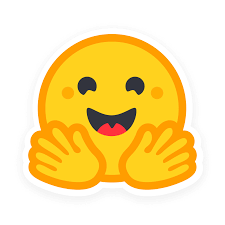

- transformer
- transformer js 
- request lib를 활용해서도 사용가능
- multi-modal : Text, I2T, T2S

In [3]:
# 주석 필터
import warnings
warnings.filterwarnings(action='ignore')

### 텍스트 기반 감정분석

In [6]:
#  pipeline("task")
from transformers import pipeline
classifier = pipeline("text-classification")
# distilbert/distilbert-base-uncased-finetuned-sst-2-english
classifier("I've been waiting for a HuggingFace course my whole life.")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9598049521446228}]

In [7]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis")
classifier(
    [
        "I've been waiting for a HuggingFace course my whole life.",
        "I hate this so much!",
    ]
)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9598049521446228},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

In [6]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis", "distilbert-base-uncased-finetuned-sst-2-english")
classifier(
    [
        "I've been waiting for a HuggingFace course my whole life.",
        "I hate this so much!",
    ]
)

[{'label': 'POSITIVE', 'score': 0.9598049521446228},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

### 제로샷 분류

제로샷(Zero-shot) 
- 제로샷 학습은 이전에 학습된 모델을 사용하여 학습 데이터에 없는 새로운 클래스를 인식하고 분류함
- 이를 위해서는 새로운 클래스에 대한 설명 정보를 입력으로 주어야함

In [8]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification","facebook/bart-large-mnli")  # 제로샷 분류
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
) 

{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445982933044434, 0.11197470128536224, 0.04342702776193619]}

### 텍스트 생성

In [9]:
from transformers import pipeline
generator = pipeline("text-generation", "gpt2")  # 텍스트 생성
generator("In this course, we will teach you how to")

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


[{'generated_text': 'In this course, we will teach you how to create a simple, modern, non-profit company called ZuZu. ZuZu has a focus on quality of life solutions. We also teach you about the design of products and services'}]

### 마스크 채우기

In [14]:
from transformers import pipeline
unmasker = pipeline("fill-mask","distilroberta-base")  # 마스크 채우기
# <mask>  : 여기에 들어갈 단어 넣기, top_k 확률값이 높은 단어 추가, 기본 5개
unmasker("I'm going to hospital and meet a <mask>.", top_k=2)
# unmasker("I'm going to hospital and meet a <mask>.")

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.18857237696647644,
  'token': 3299,
  'token_str': ' doctor',
  'sequence': "I'm going to hospital and meet a doctor."},
 {'score': 0.1399107575416565,
  'token': 9008,
  'token_str': ' nurse',
  'sequence': "I'm going to hospital and meet a nurse."}]

### 개체명 인식

In [15]:
from transformers import pipeline
ner = pipeline("ner", "dbmdz/bert-large-cased-finetuned-conll03-english", grouped_entities=True)  # 개체명 인식
ner("My name is Sylvain and I work at Hugging Face in Brooklyn.") 

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'entity_group': 'PER',
  'score': np.float32(0.9981694),
  'word': 'Sylvain',
  'start': 11,
  'end': 18},
 {'entity_group': 'ORG',
  'score': np.float32(0.9796019),
  'word': 'Hugging Face',
  'start': 33,
  'end': 45},
 {'entity_group': 'LOC',
  'score': np.float32(0.9932106),
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

### 질의 응답

In [17]:
from transformers import pipeline
question_answerer = pipeline("question-answering", "distilbert-base-cased-distilled-squad")  # 질의 응답
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

{'score': 0.6949770450592041, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

### 문서 요약

In [18]:
from transformers import pipeline
summarizer = pipeline("summarization","sshleifer/distilbart-cnn-12-6")  # 요약
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of
    graduates in traditional engineering disciplines such as mechanical, civil,
    electrical, chemical, and aeronautical engineering declined, but in most of
    the premier American universities engineering curricula now concentrate on
    and encourage largely the study of engineering science. As a result, there
    are declining offerings in engineering subjects dealing with infrastructure,
    the environment, and related issues, and greater concentration on high
    technology subjects, largely supporting increasingly complex scientific
    developments. While the latter is important, it should not be at the expense
    of more traditional engineering.
 
    Rapidly developing economies such as China and India, as well as other
    industrial countries in Europe and Asia, continue to encourage and advance
    the teaching of engineering. Both China and India, respectively, graduate
    six and eight times as many traditional engineers as does the United States.
    Other industrial countries at minimum maintain their output, while America
    suffers an increasingly serious decline in the number of engineering graduates
    and a lack of well-educated engineers.
"""
)

[{'summary_text': ' The number of engineering graduates in the U.S. has declined in traditional engineering disciplines in recent years . China and India graduate six and eight times as many traditional engineers as does the United States . Rapidly developing economies in Europe and Asia continue to encourage and advance the teaching of engineering .'}]

### 번역

In [19]:
# 프랑스어 -> 영어
from transformers import pipeline
translator = pipeline("translation", "Helsinki-NLP/opus-mt-fr-en")  
translator("Ce cours est produit par Hugging Face.")

[{'translation_text': 'This course is produced by Hugging Face.'}]

In [20]:
# 한국어 -> 영어번역  : 번역율이 좋음
from transformers import pipeline
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-ko-en")  
translator("이 문장을 영어로 번역해주세요.")

[{'translation_text': 'Translate this sentence into English.'}]

In [21]:
translator(["안녕하세요? 즐거운 하루 보내세요.", "나는 피자를 좋아합니다"])

[{'translation_text': 'Hello? Have a good day.'},
 {'translation_text': 'I like pizza.'}]

### 일부 텍스트로 텍스트 완성

In [22]:
from transformers import pipeline

generator = pipeline("text-generation", "gpt2")
generator("In this course, we will teach you how to")

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


[{'generated_text': 'In this course, we will teach you how to take time out of your day when you need to work, take time out of your day for fun and take time out of your life to do something important. And we will teach you how to become'}]

# 멀티모달

### 이미지를 설명하는 텍스트 생성
- image to text

In [25]:
from transformers import pipeline

imagetotext = pipeline("image-to-text", "ydshieh/vit-gpt2-coco-en")
imagetotext("https://huggingface.co/datasets/Narsil/image_dummy/resolve/main/parrots.png")
# imagetotext("https://pds.joongang.co.kr/news/component/htmlphoto_mmdata/202306/25/488f9638-800c-4bac-ad65-82877fbff79b.jpg")

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.46.1"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

[{'generated_text': 'two birds are standing next to each other '}]

In [26]:
from PIL import Image
import requests

#url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
#url = 'https://pds.joongang.co.kr/news/component/htmlphoto_mmdata/202306/25/488f9638-800c-4bac-ad65-82877fbff79b.jpg'
# url = 'https://huggingface.co/datasets/Narsil/image_dummy/resolve/main/parrots.png'
url = 'https://pds.joongang.co.kr/news/component/htmlphoto_mmdata/202306/25/488f9638-800c-4bac-ad65-82877fbff79b.jpg'
image = Image.open(requests.get(url, stream=True).raw)
image.show()

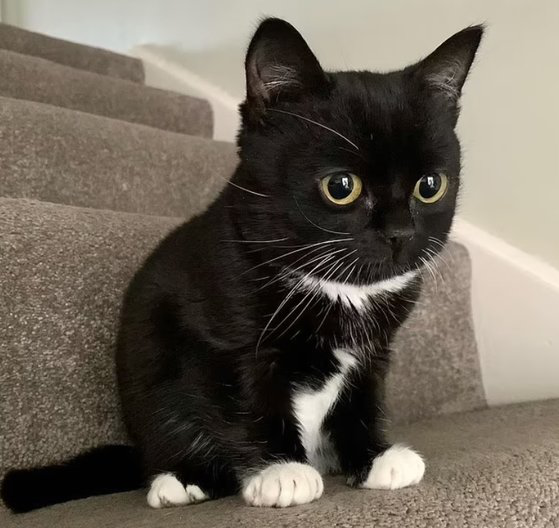

In [27]:
image

In [28]:
url = 'https://pds.joongang.co.kr/news/component/htmlphoto_mmdata/202306/25/488f9638-800c-4bac-ad65-82877fbff79b.jpg'
image = Image.open(requests.get(url, stream=True).raw)
image.show()

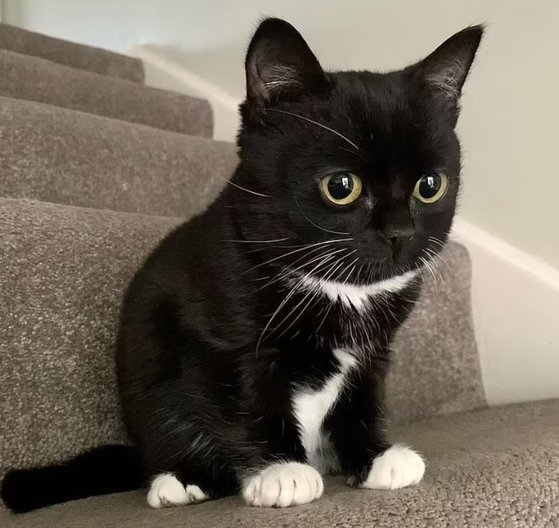

In [34]:
image

### 이미지 분류

In [29]:
#  이미지 분류
pipe = pipeline("image-classification", model="google/vit-base-patch16-224")

outputs = pipe(image)
print(outputs)

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


[{'label': 'Egyptian cat', 'score': 0.8549351096153259}, {'label': 'tabby, tabby cat', 'score': 0.0473787896335125}, {'label': 'tiger cat', 'score': 0.03496650978922844}, {'label': 'Persian cat', 'score': 0.007241605781018734}, {'label': 'Siamese cat, Siamese', 'score': 0.003725843271240592}]


In [31]:
from transformers import pipeline

# This model is a `zero-shot-classification` model.
# It will classify text, except you are free to choose any label you might imagine
classifier = pipeline(model="facebook/bart-large-mnli")
classifier(
    "I have a problem with my iphone that needs to be resolved asap!!",
    candidate_labels=["urgent", "not urgent", "phone", "tablet", "computer"],
)

{'sequence': 'I have a problem with my iphone that needs to be resolved asap!!',
 'labels': ['urgent', 'phone', 'computer', 'not urgent', 'tablet'],
 'scores': [0.5036352872848511,
  0.47880008816719055,
  0.012600114569067955,
  0.0026557904202491045,
  0.0023087465669959784]}

---

# AutoClass 를 이용하는 방법
- 토큰화 기능 사용
- 파인튜닝시 사용

## 문장의 토큰화를 직접 하고 싶을 때 

- **토큰(Token)**은 자연어 처리(NLP)에서 문장을 모델이 이해할 수 있도록 분해한 가장 작은 의미 단위
- 텍스트를 처리할 때는 단어 단위, 서브워드(subword) 단위, 또는 글자 단위로 나눌 수 있으며, 
- 이 과정을 **토큰화(tokenization)*라고 함

In [32]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
sequence = "In a hole in the ground there lived a hobbit."
print(tokenizer(sequence))

{'input_ids': [101, 1999, 1037, 4920, 1999, 1996, 2598, 2045, 2973, 1037, 7570, 10322, 4183, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [33]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

# kcbert의 tokenizer와 모델을 불러옴.
kcbert_tokenizer = AutoTokenizer.from_pretrained("beomi/kcbert-base")
# kcbert = AutoModelForMaskedLM.from_pretrained("beomi/kcbert-base")

result = kcbert_tokenizer.tokenize("너는 내년 대선 때 투표할 수 있어?")
print(result)
print(kcbert_tokenizer.vocab['대선'])
print([kcbert_tokenizer.encode(token) for token in result])

['너는', '내년', '대선', '때', '투표', '##할', '수', '있어', '?']
9311
[[2, 9039, 3], [2, 8946, 3], [2, 9311, 3], [2, 1003, 3], [2, 8701, 3], [2, 7, 7, 3358, 3], [2, 1931, 3], [2, 8749, 3], [2, 32, 3]]


In [3]:
from transformers import AutoModel, AutoTokenizer

kobert_tokenizer = AutoTokenizer.from_pretrained("skt/kobert-base-v1", use_fast=False)
# kobert = AutoModel.from_pretrained("skt/kobert-base-v1")

result = kobert_tokenizer.tokenize("너는 내년 대선 때 투표할 수 있어?")
print(result)
kobert_vocab = kobert_tokenizer.get_vocab()
print(kobert_vocab.get('▁대선'))
print([kobert_tokenizer.encode(token) for token in result])

['▁너', '는', '▁내년', '▁대선', '▁때', '▁투표', '할', '▁수', '▁있어', '?']
1654
[[1457, 3, 2], [517, 5760, 3, 2], [1437, 3, 2], [1654, 3, 2], [1844, 3, 2], [4772, 3, 2], [4977, 3, 2], [2872, 3, 2], [3868, 3, 2], [633, 3, 2]]


## 토큰화 미세조정 예

In [34]:
from transformers import AutoTokenizer

model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
encoding = tokenizer(["It was a very informative, fun and enjoyable time.", "It was a waste of time."])
print(encoding)

{'input_ids': [[101, 10197, 10140, 143, 12495, 80499, 14279, 117, 22271, 10110, 61530, 13356, 10573, 119, 102], [101, 10197, 10140, 143, 43346, 10108, 10573, 119, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [35]:
tunning_encoding = tokenizer(
    ["It was a very informative, fun and enjoyable time.", "It was a waste of time."],
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors="pt",
)
print(tunning_encoding)

{'input_ids': tensor([[  101, 10197, 10140,   143, 12495, 80499, 14279,   117, 22271, 10110,
         61530, 13356, 10573,   119,   102],
        [  101, 10197, 10140,   143, 43346, 10108, 10573,   119,   102,     0,
             0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]])}


## AutoClass 를 이용한 파인튜닝의 예

- 감성분석
- 다중분류 문제: 긍정, 부정, 중립

In [36]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# 모델 및 토크나이저 불러오기
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [37]:
import torch

# 감성 레이블을 숫자로 매칭하는 딕셔너리 준비
dic = {0:'positive', 1:'neutral', 2:'negative'}

# 입력 문장 데이터
eval_list = ["I like apple", "I like pear", "I go to school", "I dislike mosquito", "I felt very sad", "I feel so good"]

# 정답 레이블(answer label)
ans = torch.tensor([0, 0, 1, 2, 2, 0])


### 파인 튜닝 없는 상태에서의 추론

In [38]:
# 모델을 eval 모드로 전환 <- train이 아닌 test mode 라는 것을 명시
model.eval()

# 그래디언트(기울기) 계산 방지. eval 모드에서는 학습이 이뤄지지 않기에 이 조치가 필요
with torch.no_grad():
  for article in eval_list:

    # eval_list에 담긴 문장을 article이라는 변수에 하나씩 담아 토크나이저 인코딩
    inputs = tokenizer.encode(article, return_tensors="pt",padding=True, truncation=True)

    # 인코딩 결과를 모델에 투입
    outputs = model(inputs)

    # 로짓 추출
    logits = outputs.logits

    # 로짓의 최대값에 해당하는 인덱스를 추출하고, item( )을 통해 파이썬 숫자 형태로 변환
    # 결과적으로 위 숫자가 변수 dic에 담긴 인덱스가 되어 해당하는 문장의 감성을 출력
    print(f"{dic[logits.argmax(-1).item()]}:{article}")


negative:I like apple
negative:I like pear
negative:I go to school
negative:I dislike mosquito
negative:I felt very sad
negative:I feel so good


### 파인 튜닝 진행
- 에포크는 50, 활성화 함수는 AdamW, 학습률 값은 0.00001

In [39]:
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

In [40]:
# 모델을 학습 모드로 변경
model.train()

# 에포크 수 지정 및 손실을 담은 빈 컨테이너 리스트 생성
epochs = 50
losses = []

In [41]:
# 파인튜닝 수행
for epoch in range(epochs):

    # 그래디언트(기울기) 초기화
    optimizer.zero_grad()

    # 변수 eval_list에 담긴 여섯 개 문장을 토크나이저에 넣고 인코딩
    inputs = tokenizer.batch_encode_plus(eval_list, return_tensors="pt", padding=True, truncation=True)

    # 위에서 생성된 input 변수에 담긴 키(key)와 키값(value)을 **inputs 형식(**kwargs 형식)으로 모델에 전달
    # 거기에 추가로 labels를 텐서 타입으로 모델에 전달
    outputs = model(**inputs, labels=ans)

    # 로짓 추출
    logits = outputs.logits

    # 손실 추출
    loss = outputs.loss

    # 오차역전파
    loss.backward()

    # 가중치(weight) 업데이트
    optimizer.step()

    # 손실을 빈 컨테이너 losses에 순서대로 저장
    losses.append(loss)

    # 에포크 및 손실 값 출력
    # 에포크는 0부터 시작하기에, 1을 더해줘서 사람들이 에포크 회수를 더 자연스럽게 인지하게 조치
    print(f"epoch:{epoch+1}, loss:{loss}")

epoch:1, loss:1.082250952720642
epoch:2, loss:1.1144185066223145
epoch:3, loss:1.0566346645355225
epoch:4, loss:0.9597370028495789
epoch:5, loss:0.9943979382514954
epoch:6, loss:0.9596682190895081
epoch:7, loss:0.9318417906761169
epoch:8, loss:0.9636138081550598
epoch:9, loss:0.9038857817649841
epoch:10, loss:0.8794220089912415
epoch:11, loss:0.8966596722602844
epoch:12, loss:0.7835941910743713
epoch:13, loss:0.8309938311576843
epoch:14, loss:0.7460739016532898
epoch:15, loss:0.7011055946350098
epoch:16, loss:0.7968235611915588
epoch:17, loss:0.7779385447502136
epoch:18, loss:0.6911457180976868
epoch:19, loss:0.7346802353858948
epoch:20, loss:0.7018577456474304
epoch:21, loss:0.6721386313438416
epoch:22, loss:0.5448866486549377
epoch:23, loss:0.5908669829368591
epoch:24, loss:0.540058434009552
epoch:25, loss:0.5289236903190613
epoch:26, loss:0.5527324676513672
epoch:27, loss:0.4356769323348999
epoch:28, loss:0.5599837303161621
epoch:29, loss:0.4739726781845093
epoch:30, loss:0.37630143

In [42]:
new_losses = [i.item() for i in losses]

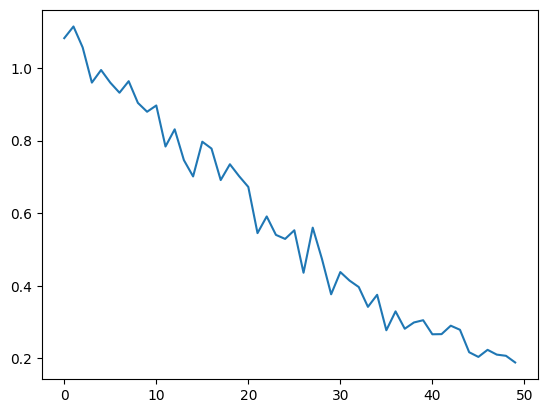

In [44]:
# loss 값 시각화
import matplotlib.pyplot as plt
plt.plot(new_losses);

### 파인 튜닝 이후 추론

In [45]:
dic = {0:'positive', 1:'neutral', 2:'negative'}
eval_list = ["I like apple", "I like pear", "I go to school", "I dislike mosquito", "I felt very sad", "I feel so good"]

# 모델을 eval 모델로 전환
model.eval()

# 모델 예측을 담을 preds라는 빈 컨테이너 리스트 생성
preds = []

# 이하 코드의 설명은 문제 45 코드 참조
with torch.no_grad():
  for article in eval_list:
    inputs = tokenizer.encode(article, return_tensors="pt",padding=True, truncation=True)
    outputs = model(inputs)
    logits = outputs.logits
    pred = logits.argmax(-1).item()
    preds.append(logits.argmax(-1).item())
    print(f"{dic[pred]}:{article}")


positive:I like apple
positive:I like pear
neutral:I go to school
negative:I dislike mosquito
negative:I felt very sad
positive:I feel so good


### 파인튜닝한 모델 저장
- 파인튜닝한 모델과 토크나이저 저장

In [46]:
save_directory = "./mymodel/BERT_classification_save_pretrained"
tokenizer.save_pretrained(save_directory)
model.save_pretrained(save_directory)

In [47]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [48]:
my_model = AutoModelForSequenceClassification.from_pretrained("./mymodel/BERT_classification_save_pretrained")

### 파인 튜닝 이후 추론

In [49]:

dic = {0:'positive', 1:'neutral', 2:'negative'}
eval_list = ["I like apple", "I like pear", "I go to school", "I dislike mosquito", "I felt very sad", "I feel so good"]

# 모델을 eval 모델로 전환
my_model.eval()

# 모델 예측을 담을 preds라는 빈 컨테이너 리스트 생성
preds = []

# 이하 코드의 설명은 문제 45 코드 참조
with torch.no_grad():
  for article in eval_list:
    inputs = tokenizer.encode(article, return_tensors="pt",padding=True, truncation=True)
    outputs = my_model(inputs)
    logits = outputs.logits
    pred = logits.argmax(-1).item()
    preds.append(logits.argmax(-1).item())
    print(f"{dic[pred]}:{article}")

positive:I like apple
positive:I like pear
neutral:I go to school
negative:I dislike mosquito
negative:I felt very sad
positive:I feel so good


In [50]:
# item()에 의해 넘파이 숫자값이 된 preds를 다시 토치 텐서 타입으로 변환
import torch
preds = torch.tensor(preds)

In [51]:
# preds 출력
preds     

tensor([0, 0, 1, 2, 2, 0])

In [52]:
# 정답(ans)와 예측(preds)가 일치하는 건수를
# 정답(ans)의 전체 건수로 나누어서 정확도(Accuracy) 계산
print(f"Accuracy:{100 * sum(ans.detach().clone()==preds)/len(ans.detach().clone())}%")

Accuracy:100.0%


---